In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy.signal import hilbert
print(scipy.__version__)

1.6.2


[ 0.91683032  1.1270414  -3.3309104  ... -0.56987675 -0.82754246
 -0.57092679]
48000
0.0008333506948061418
0.024999479166666668
-599.9875000000001


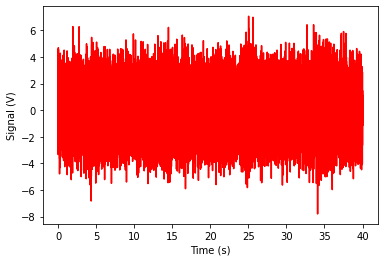

<Figure size 432x288 with 0 Axes>

In [199]:
#Plotting signal as function of time


signal = np.loadtxt('signal.mat')
print(signal)
duration = 40
N = len(signal)

print(N)
time = np.linspace(0,duration,N)
plt.plot(time, signal, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.figure()


delta_t = time[1]-time[0]
print(delta_t)

delta_f = 1/(N*delta_t)
print(delta_f)

freq_values = np.linspace(0, (N-1)*delta_f, N)
freq_values = freq_values - (N/2)*delta_f
print(freq_values[0])

48000


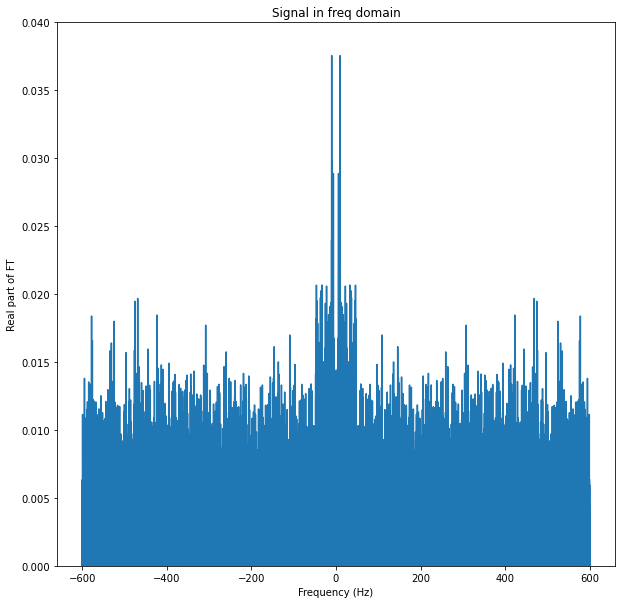

In [170]:
## fourier transform
Fourier_Transform = np.fft.fft(signal)/N
Fourier_Transform = np.fft.fftshift(Fourier_Transform)
print(len(Fourier_Transform))
#Fourier_Transform = abs(Fourier_Transform)
#Fourier_Transform = Fourier_Transform -0.01

fig = plt.figure(figsize = (10,10))
ax = plt.axes()

ax.set_title('Signal in freq domain')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Real part of FT')
ax.plot(freq_values, Fourier_Transform.real, )
#ax.set_xlim([0, 90]) 
ax.set_ylim([0, 0.04]) 


plt.show()

[ 0.0090752 +0.j         -0.00189064+0.00164871j -0.00399737+0.01014891j
 ...  0.00289688+0.00295329j -0.0060394 +0.00339322j
  0.0063286 +0.0013982j ]
[0.00000000e+00 2.49994792e-02 4.99989583e-02 ... 5.99912502e+02
 5.99937501e+02 5.99962501e+02]


/Users/nathancrooks/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


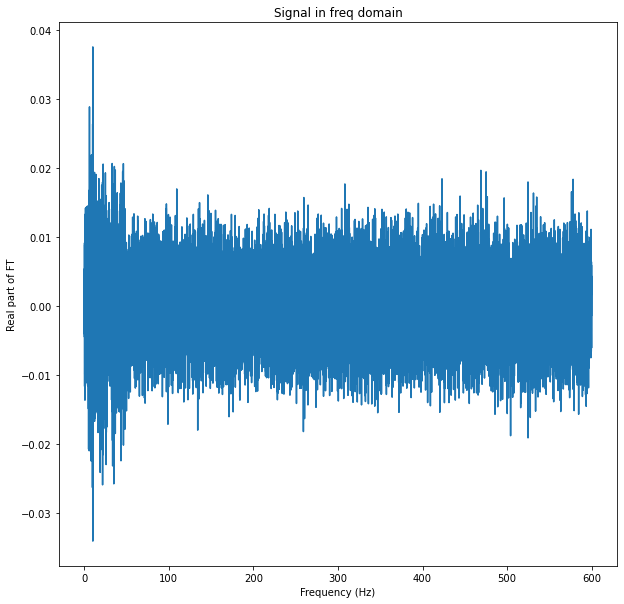

In [171]:
#Slicing the arrays so that we only consider the positive frequencies as plot is symmetric 



FT_Pos = Fourier_Transform[int(len(Fourier_Transform)/2):]
print(FT_Pos)


freq_values_Pos = freq_values[int(len(freq_values)/2):]
print(freq_values_Pos)

fig = plt.figure(figsize = (10,10))
ax1 = plt.axes()

ax1.set_title('Signal in freq domain')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Real part of FT')
ax1.plot(freq_values_Pos, FT_Pos, )
#ax1.set_xlim([0, 70]) 
#ax1.set_ylim([0, 0.04]) 

plt.show()

In [172]:
#finding frequency relating to highest peak in range 0-8 Hz

ind1 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#max positive frequency is 600Hz but want to check in range 0-8 so need to check,
#, arrays from index (4*len(FT_Pos)/600) to index (8*len(FT_Pos)/600) --> 160 to 320

for i in range (int(4*len(FT_Pos)/600), int(8*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind1 = i
#print the index of maximum element
print("The highest peak of FT in range 4-8Hz is: ",FT_Pos[ind1])
print("The associated frequency of the highest peak of FT in range 4-8Hz is: ",freq_values_Pos[ind1])

#finding frequency relating to highest peak in range 8-13 Hz

ind2 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 8-13Hz so need to check arrays from,
#, index (8*len(FT_Pos)/600) to index (13*len(FT_Pos)/600 ) --> 320 to 520

for i in range (int(8*len(FT_Pos)/600), int(13*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind2 = i
#print the index of maximum element
print("The highest peak of FT in range 8-13Hz is: ",FT_Pos[ind2])
print("The associated frequency of the highest peak of FT in range 8-13Hz is: ",freq_values_Pos[ind2])

#finding frequency relating to highest peak in range 13-30 Hz

ind3 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 13-30Hz so need to check arrays from,
#, index (13*len(FT_Pos)/600 ) to index (30*len(FT_Pos)/600) --> 520 to 1200

for i in range (int(13*len(FT_Pos)/600), int(30*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind3 = i
#print the index of maximum element
print("The highest peak of FT in range 13-30Hz is: ",FT_Pos[ind3])
print("The associated frequency of the highest peak of FT in range 13-30Hz is: ",freq_values_Pos[ind3])

#finding frequency relating to highest peak in range 30-50 Hz

ind4 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 30-50Hz so need to check arrays from,
#, index (30*len(FT_Pos)/600 ) to index (50*len(FT_Pos)/600) --> 1200 to 2000

for i in range (int(30*len(FT_Pos)/600), int(50*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind4 = i
#print the index of maximum element
print("The highest peak of FT in range 30-50Hz is: ",FT_Pos[ind4])
print("The associated frequency of the highest peak of FT in range 30-50Hz is: ",freq_values_Pos[ind4])

#These values printed correspond to the frequency for the highest peak in each of the,
#, four ranges 0-10 seconds(4-8Hz), 10-20 seconds(8-13Hz), 20-30 seconds(13-30Hz)
#, and 30-40 seconds(30-50Hz) 
#I knew to check within these ranges as in the task sheet we were given,the frequency 
#, band that the dominant signal was within for each corresponding time interval



The highest peak of FT in range 4-8Hz is:  (0.028863926524022875+2.008327251026761e-05j)
The associated frequency of the highest peak of FT in range 4-8Hz is:  6.099872916666641
The highest peak of FT in range 8-13Hz is:  (0.037543917082853734-0.02157658407438168j)
The associated frequency of the highest peak of FT in range 8-13Hz is:  10.074790104166595
The highest peak of FT in range 13-30Hz is:  (0.02058047844406685+0.0038593998689515296j)
The associated frequency of the highest peak of FT in range 13-30Hz is:  22.249536458333296
The highest peak of FT in range 30-50Hz is:  (0.02066360520547931+0.0023148085245512256j)
The associated frequency of the highest peak of FT in range 30-50Hz is:  32.9243140625


6.099872916666641


/Users/nathancrooks/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


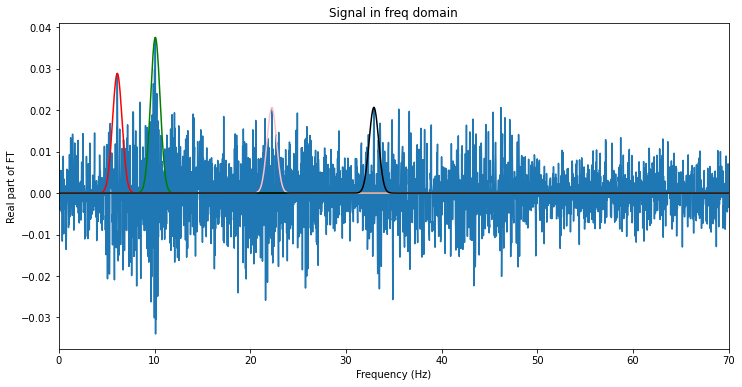

In [217]:
#Using the highest peak values to centre the four respective gaussian band pass filters on

#The gaussian band pass filter for 0-10 seconds(4-8Hz)

print(freq_values_Pos[ind1])

x = np.linspace(-600,600,len(Fourier_Transform))
a1 = FT_Pos[ind1]
a1 = a1.real
b1 = freq_values_Pos[ind1]
c1 = 0.5
band_pass1 = a1*np.exp((-(x-b1)**2)/(2*c1**2))

#The gaussian band pass filter for 10-20 seconds(8-13Hz)

a2 = FT_Pos[ind2].real
b2 = freq_values_Pos[ind2]
c2 = 0.5
band_pass2 = a2 * np.exp((-(x-b2)**2)/(2*c2**2))

#The gaussian band pass filter for 20-30 seconds(13-30Hz)

a3 = FT_Pos[ind3].real
b3 = freq_values_Pos[ind3]
c3 = 0.5
band_pass3 = a3 * np.exp((-(x-b3)**2)/(2*c3**2))

#The gaussian band pass filter for 30-40 seconds(30-50Hz)

a4 = FT_Pos[ind4]
a4 = a4.real
b4 = freq_values_Pos[ind4]
c4 = 0.5
band_pass4 = a4 * np.exp((-(x-b4)**2)/(2*c4**2))

fig = plt.figure(figsize = (12,6))
ax2 = plt.axes()



ax2.set_title('Signal in freq domain')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Real part of FT')
#ax2.plot(freq_values_Pos, FT_Pos )
ax2.plot(freq_values, Fourier_Transform)
ax2.plot(x, band_pass1,color='red')
ax2.plot(x, band_pass2,color='green')
ax2.plot(x, band_pass3,color='pink')
ax2.plot(x, band_pass4,color='black')
ax2.set_xlim([0, 70]) 
#ax2.set_ylim([0, 0.04]) 


plt.show()

0.028427821392796707
-0.00037483942999716523


<ipython-input-219-b43caba5f6f2>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass1[i] = Fourier_Transform[i] * band_pass1[i]
<ipython-input-219-b43caba5f6f2>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass2[i] = Fourier_Transform[i] * band_pass2[i]
<ipython-input-219-b43caba5f6f2>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass3[i] = Fourier_Transform[i] * band_pass3[i]
<ipython-input-219-b43caba5f6f2>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass4[i] = Fourier_Transform[i] * band_pass4[i]


(0.0, 10.0)

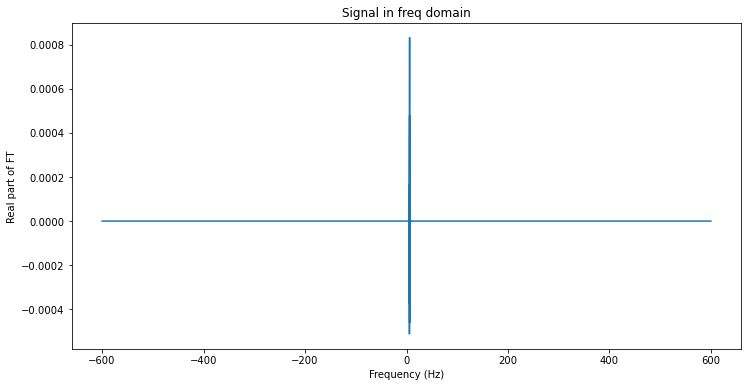

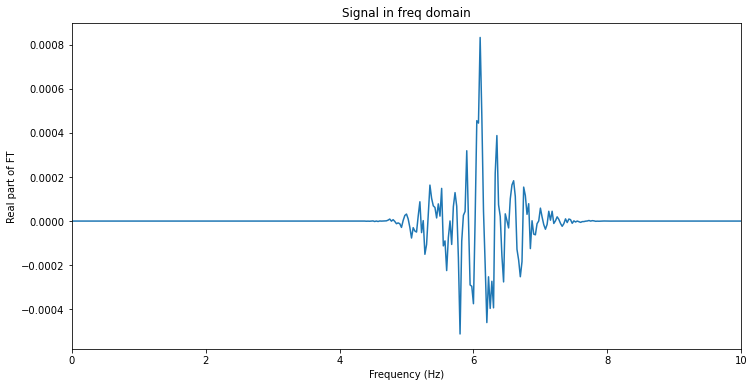

In [219]:
FT_bandpass1 = np.zeros(len(Fourier_Transform))
FT_bandpass2 = np.zeros(len(Fourier_Transform))
FT_bandpass3 = np.zeros(len(Fourier_Transform))
FT_bandpass4 = np.zeros(len(Fourier_Transform))
print(band_pass1[24240])

for i in range(len(FT_bandpass1)):
    FT_bandpass1[i] = Fourier_Transform[i] * band_pass1[i]
    FT_bandpass2[i] = Fourier_Transform[i] * band_pass2[i]
    FT_bandpass3[i] = Fourier_Transform[i] * band_pass3[i]
    FT_bandpass4[i] = Fourier_Transform[i] * band_pass4[i]
    
print(FT_bandpass1[24240])


fig = plt.figure(figsize = (12,6))
ax3 = plt.axes()

ax3.set_title('Signal in freq domain')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Real part of FT')
ax3.plot(freq_values, FT_bandpass1 )
#ax3.plot(x, band_pass1,color='red')
#ax3.set_xlim([0, 10]) 
#ax3.set_ylim([0, 0.0005])

fig = plt.figure(figsize = (12,6))
ax4 = plt.axes()

ax4.set_title('Signal in freq domain')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Real part of FT')
ax4.plot(freq_values, FT_bandpass1.real )
#ax3.plot(x, band_pass1,color='red')
ax4.set_xlim([0, 10]) 
#ax4.set_ylim([0, 0.04])

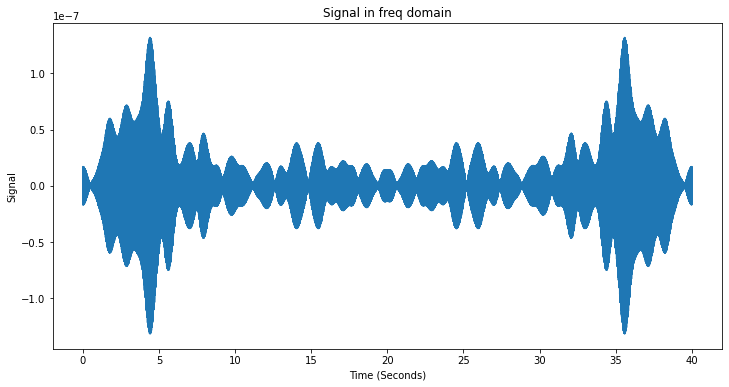

In [231]:
signal_filtered1 = np.fft.irfft(FT_bandpass1)
signal_filtered2 = np.fft.irfft(FT_bandpass2)
signal_filtered3 = np.fft.irfft(FT_bandpass3)
signal_filtered4 = np.fft.irfft(FT_bandpass4)

fig = plt.figure(figsize = (12,6))
ax5 = plt.axes()


time_enhanced = np.linspace(0,duration, 96000)
t = time_enhanced[:95998]


ax5.set_title('Signal in freq domain')
ax5.set_xlabel('Time (Seconds)')
ax5.set_ylabel('Signal')
ax5.plot(t, signal_filtered1 )
#ax5.plot(x, band_pass1,color='red')
#ax5.set_xlim([0, 40]) 
#ax5.set_ylim([-0.00000025, 0.00000025])

#[:47998]

(0.0, 40.0)

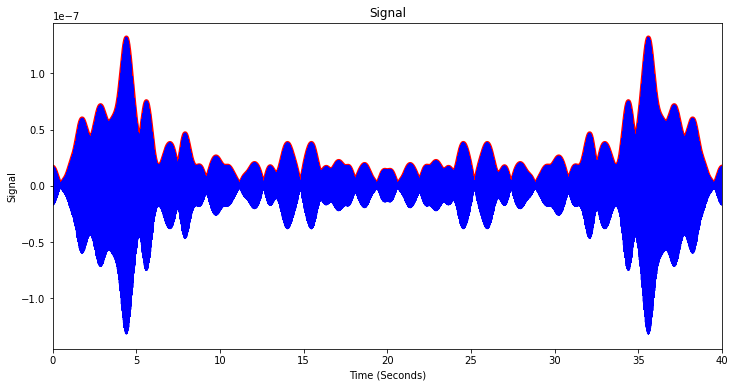

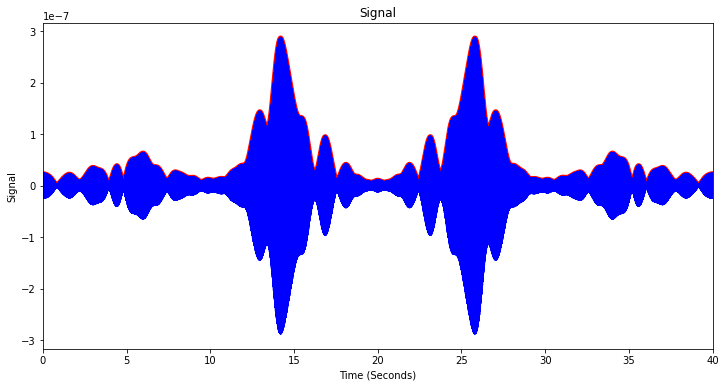

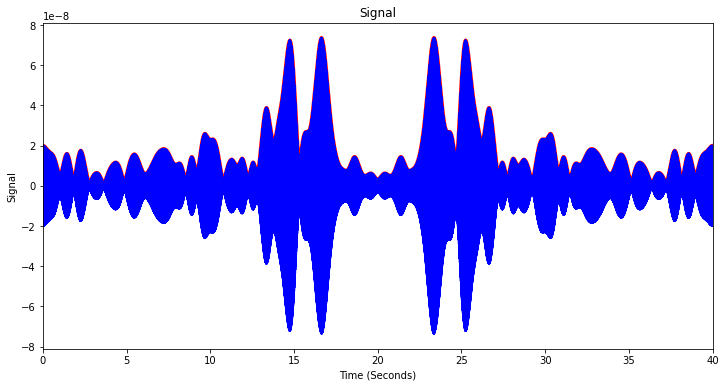

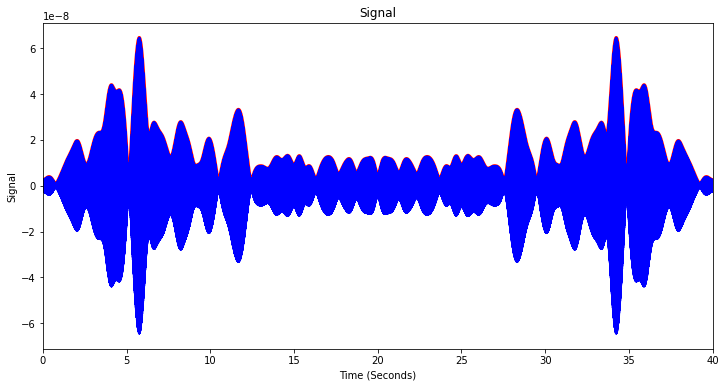

In [232]:
analytic_signal1 = hilbert(signal_filtered1)
amplitude_envelope1 = np.abs(analytic_signal1)

analytic_signal2 = hilbert(signal_filtered2)
amplitude_envelope2 = np.abs(analytic_signal2)

analytic_signal3 = hilbert(signal_filtered3)
amplitude_envelope3 = np.abs(analytic_signal3)

analytic_signal4 = hilbert(signal_filtered4)
amplitude_envelope4 = np.abs(analytic_signal4)


fig = plt.figure(figsize = (12,6))
ax6 = plt.axes()

ax6.set_title('Signal')
ax6.set_xlabel('Time (Seconds)')
ax6.set_ylabel('Signal')
ax6.plot(t, amplitude_envelope1, color='r',linewidth = '4')
ax6.plot(t, signal_filtered1, color='b')
#ax6.plot(x, band_pass1,color='red')
ax6.set_xlim([0, 40]) 
#ax6.set_ylim([-0.0000001, 0.0000002])

fig = plt.figure(figsize = (12,6))
ax7 = plt.axes()

ax7.set_title('Signal')
ax7.set_xlabel('Time (Seconds)')
ax7.set_ylabel('Signal')
ax7.plot(t, amplitude_envelope2, color='r',linewidth = '4')
ax7.plot(t, signal_filtered2, color='b')
#ax7.plot(x, band_pass1,color='red')
ax7.set_xlim([0, 40]) 
#ax7.set_ylim([-0.0000001, 0.0000002])

fig = plt.figure(figsize = (12,6))
ax8 = plt.axes()

ax8.set_title('Signal')
ax8.set_xlabel('Time (Seconds)')
ax8.set_ylabel('Signal')
ax8.plot(t, amplitude_envelope3, color='r',linewidth = '3')
ax8.plot(t, signal_filtered3, color='b')
#ax8.plot(x, band_pass,color='red')
ax8.set_xlim([0, 40]) 
#ax8.set_ylim([-0.0000001, 0.0000002])

fig = plt.figure(figsize = (12,6))
ax9 = plt.axes()

ax9.set_title('Signal')
ax9.set_xlabel('Time (Seconds)')
ax9.set_ylabel('Signal')
ax9.plot(t, amplitude_envelope4, color='r',linewidth = '3')
ax9.plot(t, signal_filtered4, color='b')
#ax9.plot(x, band_pass,color='red')
ax9.set_xlim([0, 40]) 
#ax9.set_ylim([-0.0000001, 0.0000002])